In [1]:
import malaya_speech
from malaya_speech import Pipeline
import IPython.display as ipd

### Load wav

In [15]:
y, sr = malaya_speech.load('background-multispeaker.wav')
len(y) / sr

3.0110625

### Load noise reduction model

In [3]:
model = malaya_speech.noise_reduction.deep_model(model = 'resnet-unet')

### Load multispeakers separation

In [4]:
separation_model = malaya_speech.multispeaker_separation.deep_wav('fastsep-4')

### Create pipeline

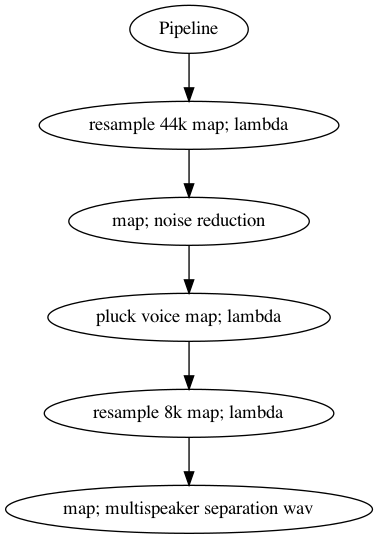

In [6]:
p = Pipeline()
frame = (
    p.map(lambda x: malaya_speech.resample(x, sr, 44100), name = 'resample 44k')
    .map(model)
    .map(lambda x: x['voice'], name = 'pluck voice')
    .map(lambda x: malaya_speech.resample(x, 44100, 8000), name = 'resample 8k')
    .map(separation_model)
)
p.visualize()

In [23]:
%%time

results = p.emit(y)

CPU times: user 21.7 s, sys: 2.44 s, total: 24.1 s
Wall time: 3.74 s


In [17]:
results.keys()

dict_keys(['resample 44k', 'noise-reduction', 'pluck voice', 'resample 8k', 'multispeaker-separation-wav'])

In [18]:
ipd.Audio(y, rate = sr)

In [19]:
ipd.Audio(results['pluck voice'], rate = 44100)

In [24]:
ipd.Audio(results['multispeaker-separation-wav'][0], rate = 8000)

In [25]:
ipd.Audio(results['multispeaker-separation-wav'][1], rate = 8000)

In [26]:
ipd.Audio(results['multispeaker-separation-wav'][2], rate = 8000)